<a href="https://colab.research.google.com/github/nirajband/FMML_Projects_and-Labs/blob/main/ImageClassificaton_Project03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd

# Load CSV files
train_csv_path = '/content/fashion-mnist_train.csv'
test_csv_path = '/content/fashion-mnist_test.csv'

# Read data
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

# Display data
print("Training Data:")
print(train_data.head())
print("\nTesting Data:")
print(test_data.head())

Training Data:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0    

In [2]:
# Additional libraries for preprocessing and training
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Set constants
num_classes = 10
epochs = 30
batch_size = 128
learning_rate = 0.0005

In [3]:
# Convert dataframes to numpy arrays and normalize
train_df = pd.read_csv('/content/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/fashion-mnist_test.csv')

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255.0
y_train = train_data[:, 0]
x_test = test_data[:, 1:] / 255.0
y_test = test_data[:, 0]

# Split train data into training and validation sets
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

# Reshape data for CNN
image_shape = (28, 28, 1)
x_train = x_train.reshape(-1, *image_shape)
x_validate = x_validate.reshape(-1, *image_shape)
x_test = x_test.reshape(-1, *image_shape)

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.shape

(60000, 785)

In [8]:
test_df.shape

(10000, 785)

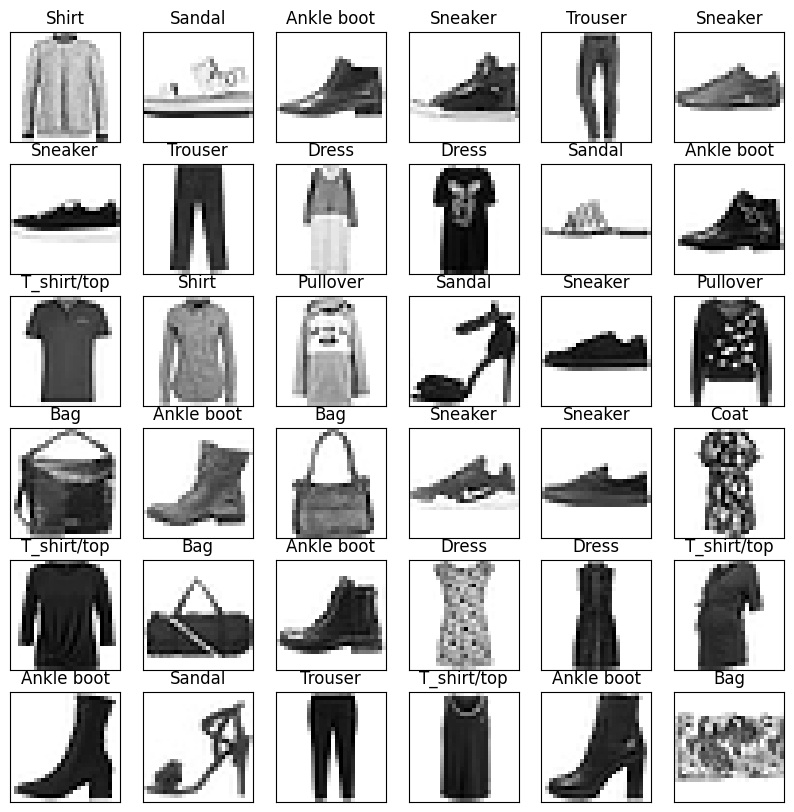

In [9]:
# Define class names
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display sample images
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.title(class_names[int(y_train[i])])
plt.show()

In [10]:
# Build CNN model with additional enhancements
cnn_model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=image_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

# Compile model
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

In [11]:
# Train the model and record history
history = cnn_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_validate, y_validate),
    verbose=1
)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 154s 404ms/step - accuracy: 0.7285 - loss: 0.8367 - val_accuracy: 0.2342 - val_loss: 3.4318
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 154s 410ms/step - accuracy: 0.8477 - loss: 0.4173 - val_accuracy: 0.8836 - val_loss: 0.3226
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 207s 423ms/step - accuracy: 0.8737 - loss: 0.3466 - val_accuracy: 0.8949 - val_loss: 0.2829
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 151s 403ms/step - accuracy: 0.8833 - loss: 0.3151 - val_accuracy: 0.9023 - val_loss: 0.2557
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 201s 399ms/step - accuracy: 0.8942 - loss: 0.2846 - val_accuracy: 0.8957 - val_loss: 0.2730
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 206s 410ms/step - accuracy: 0.9013 - loss: 0.2690 - val_accuracy: 0.8908 - val_loss: 0.2835
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 198s 401ms/step - accuracy: 0.9050 - loss: 0.2568 - val_accuracy: 0.9093 - val_loss: 0.2490
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 201s 399ms/step - accuracy: 0.9117 -

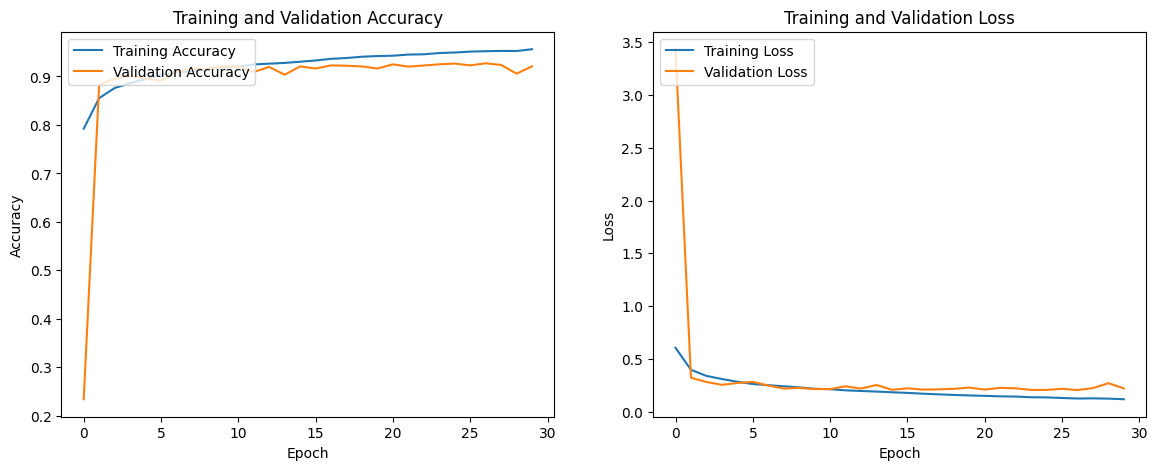

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

In [13]:
# Evaluate on test data
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.2169
Test Accuracy: 0.9274


In [14]:
# Predict and generate classification report
from sklearn.metrics import classification_report
predictions = cnn_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Classification report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
              precision    recall  f1-score   support

     Class 0       0.88      0.89      0.88      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.93      0.82      0.87      1000
     Class 3       0.93      0.94      0.94      1000
     Class 4       0.84      0.93      0.88      1000
     Class 5       1.00      0.98      0.99      1000
     Class 6       0.79      0.78      0.79      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



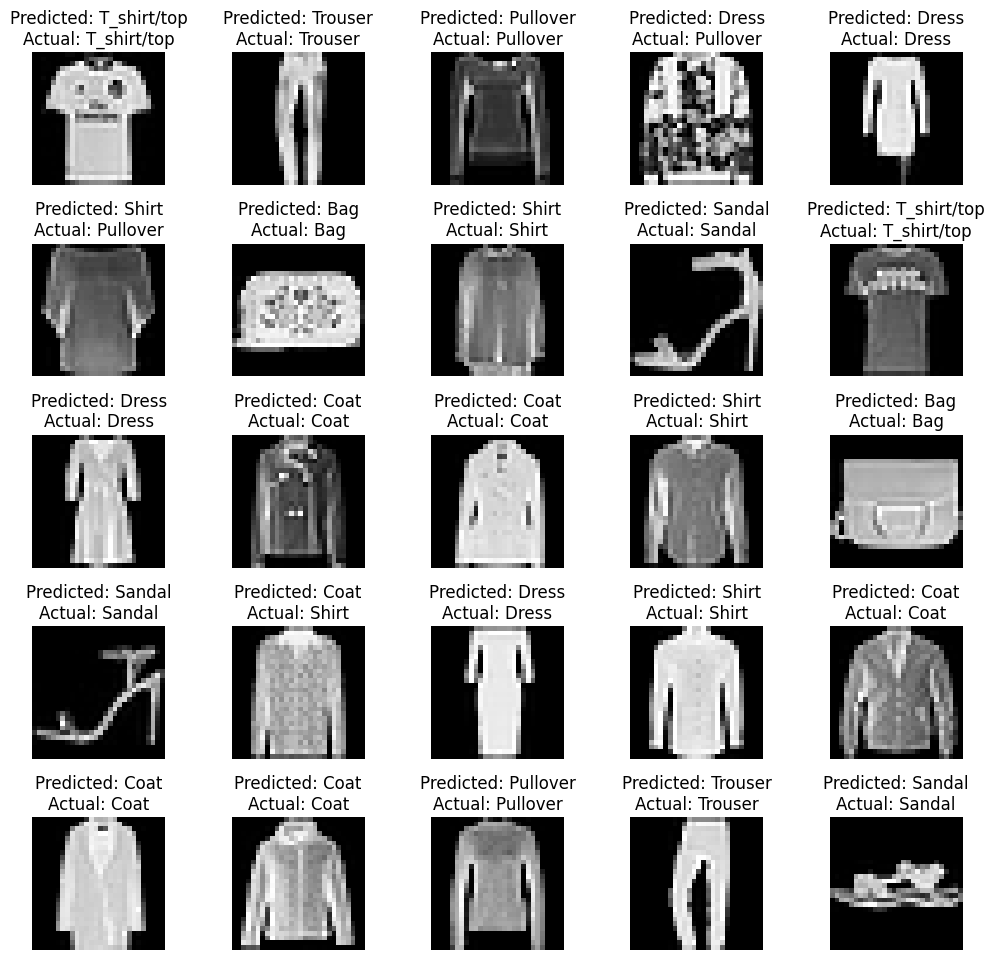

In [15]:
# Display some test images along with their predicted and actual labels
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Predicted: {class_names[predicted_classes[i]]}\nActual: {class_names[int(y_test[i])]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()